# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset? <br>
<b> No, there are no missing values. However, Glucose, BloodPressure, SkinThickness, Insulin, BMI have 0 values, which is not physically possible. I replaced the Zeros with the mean of each column. </b>
- How are the predictor variables related to the outcome variable? <br>
<b> Each predictor variable has a positive or negative relationship with the outcome variable.</b>
- What is the correlation between the predictor variables? <br>
<b> There are several correlations between the predictor variables, like Age, Pregnancies, Insulin, etc.</b>
- What is the distribution of each predictor variable?<br>
<b>Using the describe() method, we can see the distribution of each predictor variable:<br>
<b>1. Pregnancies: The 'Pregnancies' variable has a mean of approximately 3.85, indicating that, on average, the participants in the dataset have around 4 pregnancies. The standard deviation is 3.37, suggesting some variability in the number of pregnancies.<br>
<b>2. Glucose: The 'Glucose' variable has a mean of approximately 121.69, representing the average blood glucose level in the dataset. The standard deviation is 30.44, indicating some spread around the mean.<br>
<b>3. BloodPressure: The 'BloodPressure' variable has a mean of approximately 72.41, representing the average blood pressure of the participants. The standard deviation is 12.10, suggesting moderate variability in blood pressure.<br>
<b>4. SkinThickness: The 'SkinThickness' variable has a mean of approximately 29.15, indicating the average skin thickness. The standard deviation is 8.79, suggesting some variability in this measure.<br>
<b>5. Insulin: The 'Insulin' variable has a mean of approximately 155.55, representing the average insulin level. The standard deviation is 85.02, indicating a considerable spread in insulin values.<br>
<b>6. BMI: The 'BMI' variable has a mean of approximately 32.46, representing the average body mass index. The standard deviation is 6.88, indicating some variability in BMI across participants.<br>
<b>7. DiabetesPedigreeFunction: The 'DiabetesPedigreeFunction' variable has a mean of approximately 0.47, which represents a measure of the diabetes risk based on family history. The standard deviation is 0.33, suggesting some variability in this measure.<br>
<b>8. Age: The 'Age' variable has a mean of approximately 33.24, indicating the average age of the participants. The standard deviation is 11.76, suggesting some spread in age.<br>
<b>9. Outcome: The 'Outcome' variable is a binary variable (0 or 1), indicating the presence (1) or absence (0) of diabetes. The mean is approximately 0.35, suggesting that about 35% of the participants in the dataset have diabetes.<br>
- Are there any outliers in the predictor variables?<br> 
<b> Yes, there are outliers. Using Q-Q Plots, we can Insulin has the most outliers.<br> 
- How are the predictor variables related to each other?<br>
<b> Using a Correlation Matrix, we can see there are several correlations among predictors. For example: Age + Pregnancies, Outcome + Glucose, BMI + SkinThickness, and Insulin + Glucose.<br>
- Is there any interaction effect between the predictor variables?<br>
<b> Using a Multiple Linear Regression model to analyze the relationship between multiple predictor variables and the target variable 'Outcome', we see that there are:<br>
The significant interaction terms are:<br>
const: p-value = 1.041532e-18<br>
Glucose: p-value = 8.737233e-23<br>
BMI: p-value = 2.338504e-07<br>
Age: p-value = 1.132460e-03<br>
    These results indicate that the interaction between these predictor variables and possibly other predictors in the model significantly affects the outcome variable. Therefore, considering these interactions is crucial for interpreting the relationship between the predictors and the target variable accurately.<br>
- What is the average age of the individuals in the dataset?<br>
    <b>The average age is 33.240885.<br>
- What is the average glucose level for individuals with diabetes and without diabetes?<br>
<b>Average glucose level for individuals without diabetes: 110.71<br>
<b>Average glucose level for individuals with diabetes: 142.166<br>
- What is the average BMI for individuals with diabetes and without diabetes?<br>
<b> Average BMI for individuals without diabetes: 30.888<br>
<b> Average BMI for individuals with diabetes: 35.385<br>
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?<br>
<b> Based on the box plots, we can see that there is more data variablity in the data for individuals with diabetes.<br>
- Are there any differences in the predictor variables between males and females (if gender information is available)?<br>
<b> The predictor variables are the same for males and females with the exception of pregancy. There have been studies that show women who have a history of gestational diabeties during pregnancy may have a higher risk of developing type 2 diabetes later in life. 

In [1]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
# libraries
train_df = pd.read_csv('diabetes.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Assuming you have a 'Diabetes' column in the DataFrame indicating diabetics (1) and non-diabetics (0)
diabetics_data = train_df[train_df['Outcome'] == 1]
non_diabetics_data = train_df[train_df['Outcome'] == 0]

# Compute the mean for each column separately for diabetics and non-diabetics
diabetics_mean = diabetics_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean()
non_diabetics_mean = non_diabetics_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean()

# Substitute zero values with the computed mean for diabetics and non-diabetics
train_df.loc[train_df['Outcome'] == 1, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetics_data.replace(0, diabetics_mean)
train_df.loc[train_df['Outcome'] == 0, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = non_diabetics_data.replace(0, non_diabetics_mean)

In [5]:
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.267826,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.115948,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Quantile-Quantile (Q-Q) Plots

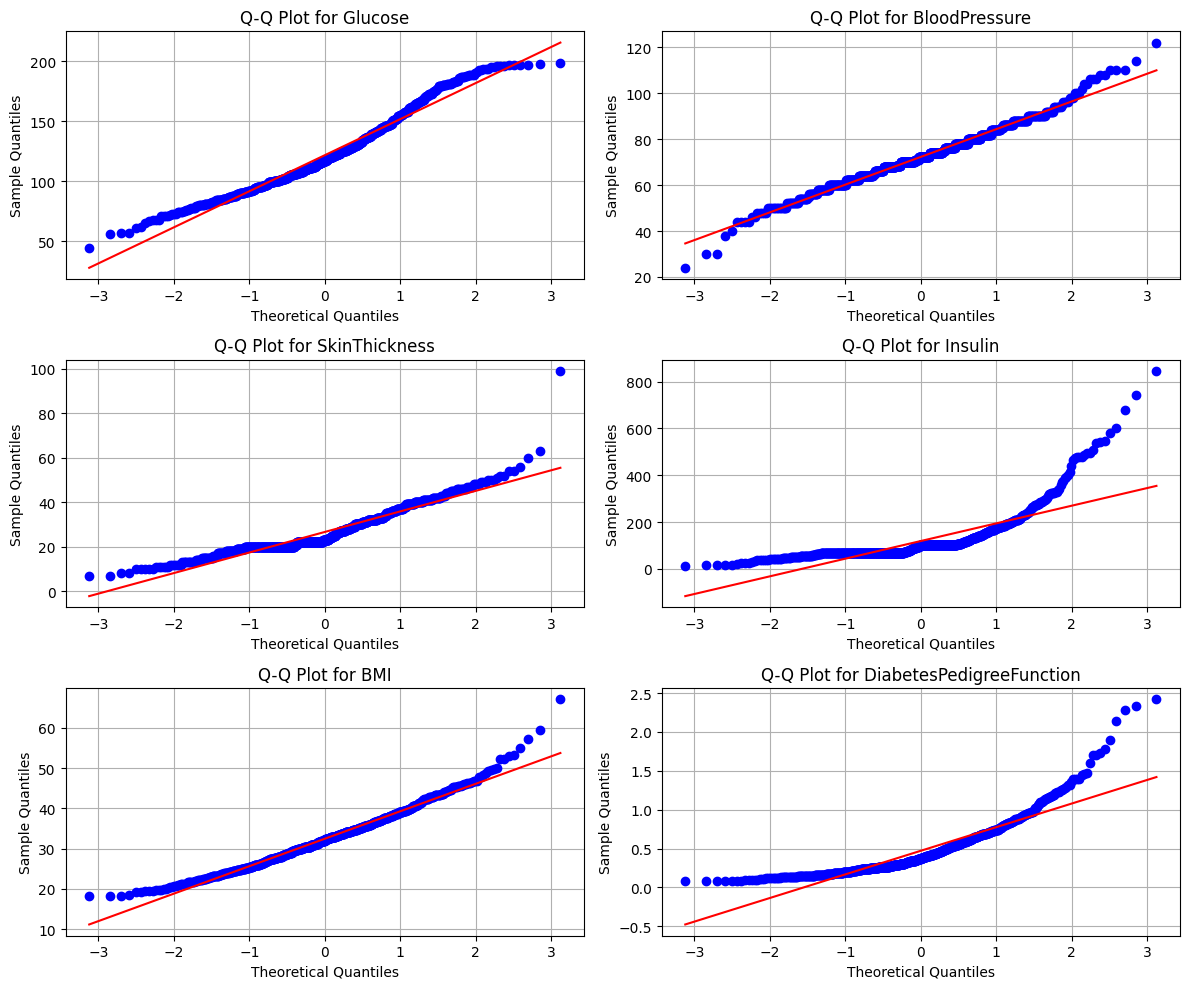

In [6]:
def generate_qq_plot(data, variable_name, ax):
    
    probplot(data[variable_name], dist='norm', plot=ax)
    ax.set_title(f'Q-Q Plot for {variable_name}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.grid(True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

generate_qq_plot(train_df, 'Glucose', axes[0, 0])
generate_qq_plot(train_df, 'BloodPressure', axes[0, 1])
generate_qq_plot(train_df, 'SkinThickness', axes[1, 0])
generate_qq_plot(train_df, 'Insulin', axes[1, 1])
generate_qq_plot(train_df, 'BMI', axes[2, 0])
generate_qq_plot(train_df, 'DiabetesPedigreeFunction', axes[2, 1])

plt.tight_layout()
plt.show()

Correlation Matrix of Predictor Variables

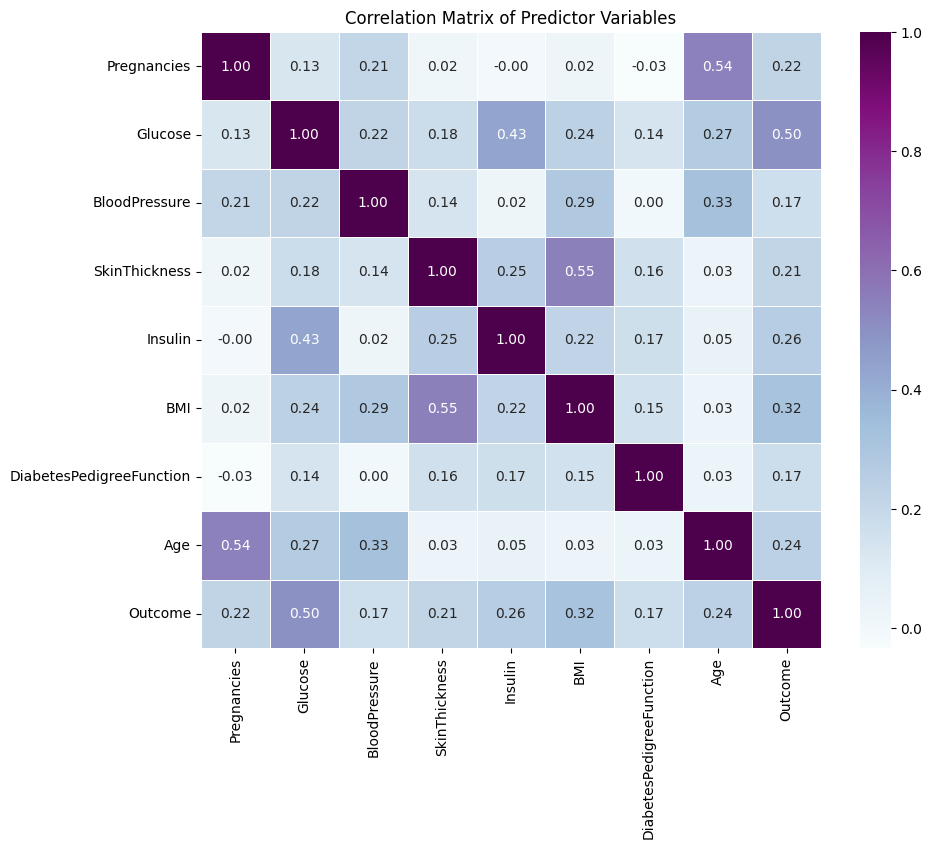

In [7]:
corr_matrix = train_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

In [8]:
# Group the data by 'Outcome' and calculate the mean glucose level for each group
glucose_mean_by_diabetes = train_df.groupby('Outcome')['Glucose'].mean()

print("Average Glucose Level for Individuals without Diabetes (Outcome = 0):", round(glucose_mean_by_diabetes[0], 3))
print("Average Glucose Level for Individuals with Diabetes (Outcome = 1):", round(glucose_mean_by_diabetes[1], 3))

Average Glucose Level for Individuals without Diabetes (Outcome = 0): 110.64
Average Glucose Level for Individuals with Diabetes (Outcome = 1): 142.312


In [9]:
# Group the data by 'BMI' and calculate the mean BMI for each group
bmi_mean_by_diabetes = train_df.groupby('Outcome')['BMI'].mean()

print("BMI Level for Individuals without Diabetes (Outcome = 0):", round(bmi_mean_by_diabetes[0], 3))
print("BMI Level for Individuals with Diabetes (Outcome = 1):", round(bmi_mean_by_diabetes[1], 3))

BMI Level for Individuals without Diabetes (Outcome = 0): 30.85
BMI Level for Individuals with Diabetes (Outcome = 1): 35.405


Side-by-side box plots for each predictor variable

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- <b>Handling missing values:</b> There are no null values, however 0 values did not make sense in the results. I converted the 0 values to the mean in each feature split by diabetes vs non-diabetes.<br>
- <b>Handling outliers:</b> I used box plots to look for outliers, then used the IQR (Interquartile Range) method to perform outlier imputation.</br>
- <b>Scaling and normalization: I did not use scaling and normaliztion, since I am using a Random Forest Module.</b>
- <b>Feature Engineering: Feature Engineering is performed with Random Forest Module. </b>
- <b>Handling imbalanced data:I did not find this data set to be imbalanced. </b>

Look for Outliers

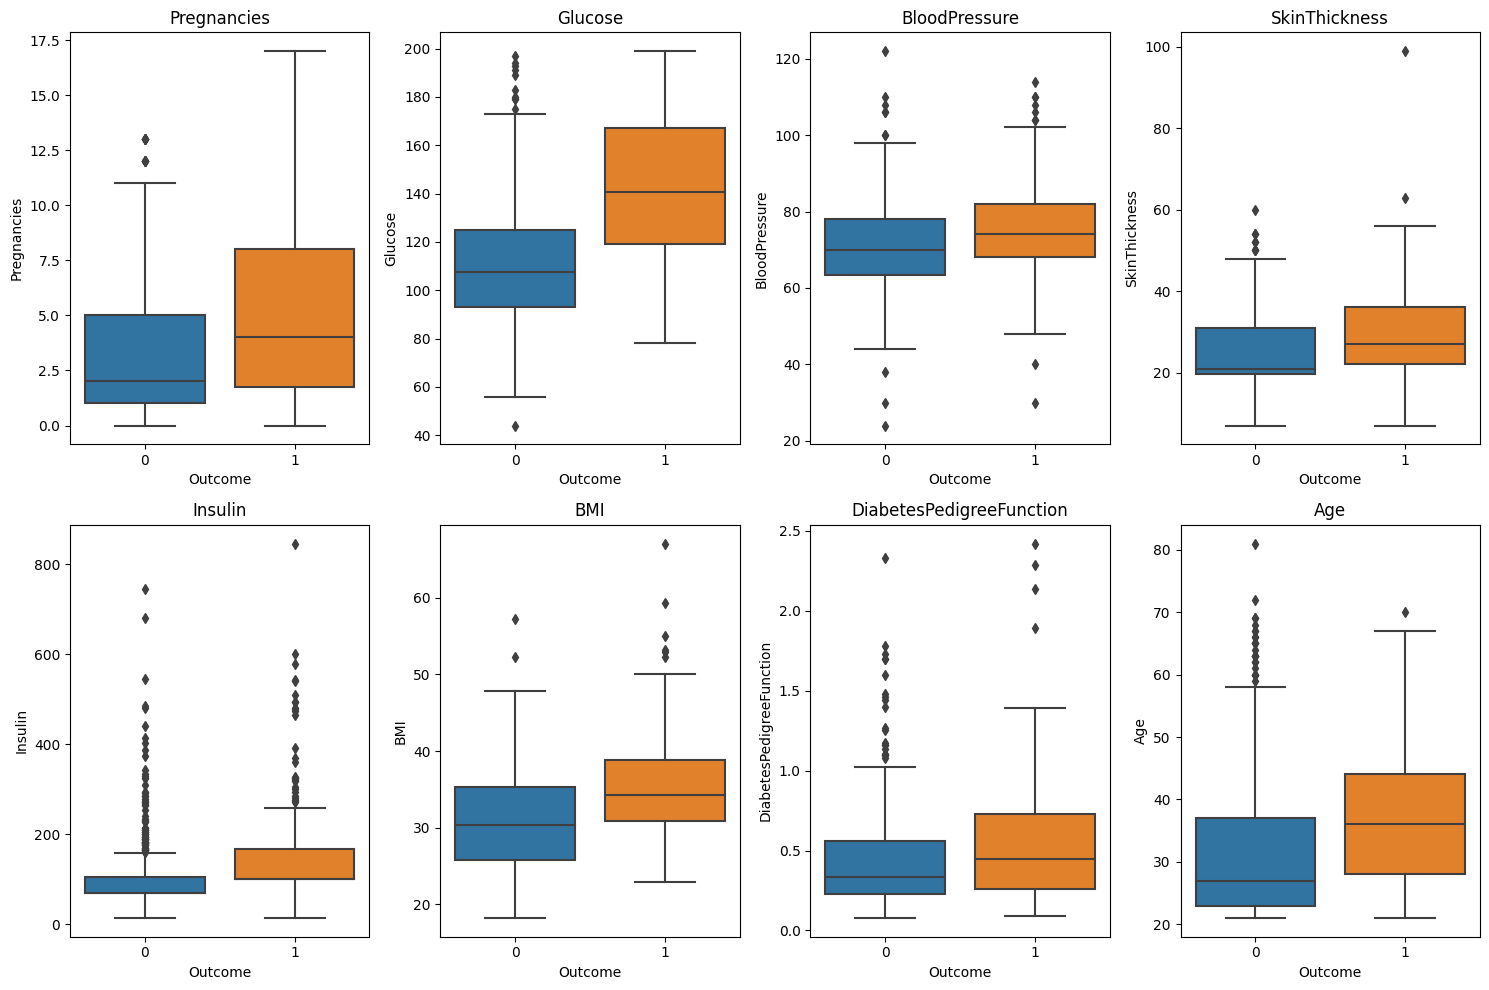

In [10]:
predictor_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, predictor in enumerate(predictor_variables):
    sns.boxplot(x='Outcome', y=predictor, data=train_df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(predictor)

plt.tight_layout()
plt.show()

 Use Impute Outliers to handle outliers

In [12]:
def impute_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Replace outlier values below the lower bound with the lower bound value
    df.loc[df[column] < lower_bound, column] = lower_bound
    
    # Replace outlier values above the upper bound with the upper bound value
    df.loc[df[column] > upper_bound, column] = upper_bound

def perform_outlier_imputation(df, predictor_variables, target_variable='Outcome', lower_percentile=0.05, upper_percentile=0.95):
    # Separate diabetes and non-diabetes data
    diabetes_data = df[df[target_variable] == 1].copy()
    non_diabetes_data = df[df[target_variable] == 0].copy()
    
    # Perform outlier imputation for each predictor variable
    for predictor in predictor_variables:
        impute_outliers(diabetes_data, predictor, lower_percentile, upper_percentile)
        impute_outliers(non_diabetes_data, predictor, lower_percentile, upper_percentile)
    
    return diabetes_data, non_diabetes_data

df = train_df

predictor_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Perform outlier imputation for diabetes and non-diabetes data
diabetes_data, non_diabetes_data = perform_outlier_imputation(df, predictor_variables)

df.update(diabetes_data)
df.update(non_diabetes_data)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

Multiple Linear Regression model with additional functions for data splitting, plotting coefficients, checking for interaction effects, cross-validation, and grid search

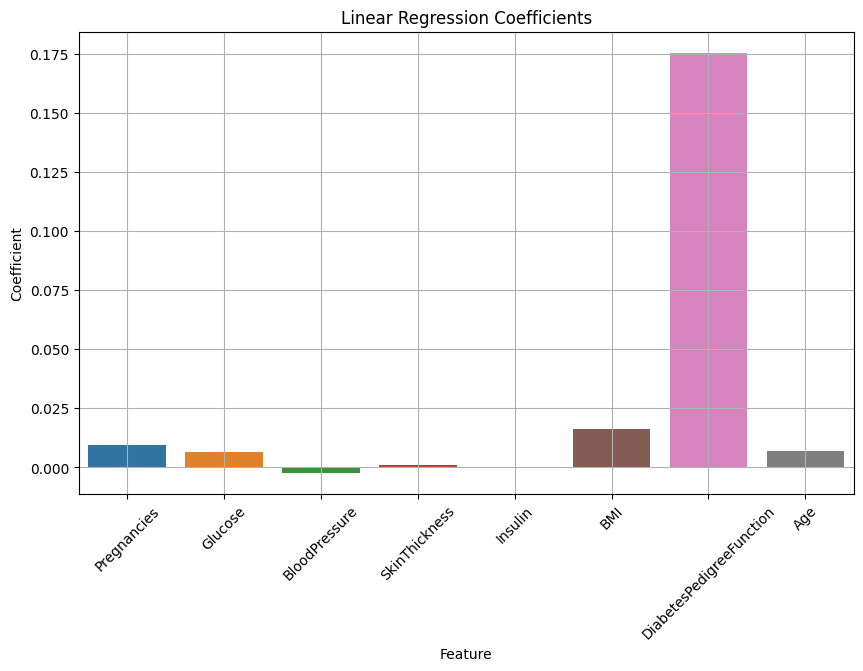

There are significant interaction effects in the model.
Significant Interaction Terms:
const                       9.951089e-22
Glucose                     6.672273e-22
BMI                         3.605411e-07
DiabetesPedigreeFunction    2.684870e-03
Age                         4.327350e-04
dtype: float64

Cross-validation Mean MSE: 0.14573083776799728
Cross-validation Std MSE: 0.01863136771814718

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}
Best Model MSE: 0.14593320807907761


In [15]:
def split_data(df):
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def fit_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def plot_coefficients(model, X_train):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature', y='Coefficient', data=pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_}))
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title('Linear Regression Coefficients')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def check_interaction_effects(X_train, y_train):
    X_train_stats = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train, X_train_stats)
    results = ols_model.fit()
    
    significant_interactions = results.pvalues[results.pvalues < 0.05]
    if len(significant_interactions) > 0:
        print("There are significant interaction effects in the model.")
        print("Significant Interaction Terms:")
        print(significant_interactions)
    else:
        print("No significant interaction effects found in the model.")

def cross_validation(X_train, y_train):
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores  # Convert negative MSE scores to positive
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    return mean_mse, std_mse

def grid_search(X_train, y_train):
    model = LinearRegression()
    param_grid = {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    }
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_params, -grid_search.best_score_

# Assuming you have the 'train_df' containing the predictor variables and target variable 'Outcome'
X_train, X_test, y_train, y_test = split_data(train_df)
model = fit_linear_regression(X_train, y_train)
plot_coefficients(model, X_train)
check_interaction_effects(X_train, y_train)

mean_mse, std_mse = cross_validation(X_train, y_train)
print("\nCross-validation Mean MSE:", mean_mse)
print("Cross-validation Std MSE:", std_mse)

best_params, best_model_mse = grid_search(X_train, y_train)
print("\nBest Hyperparameters:", best_params)
print("Best Model MSE:", best_model_mse)

Random Forest Classifier with Feature Importance and Probability distribution

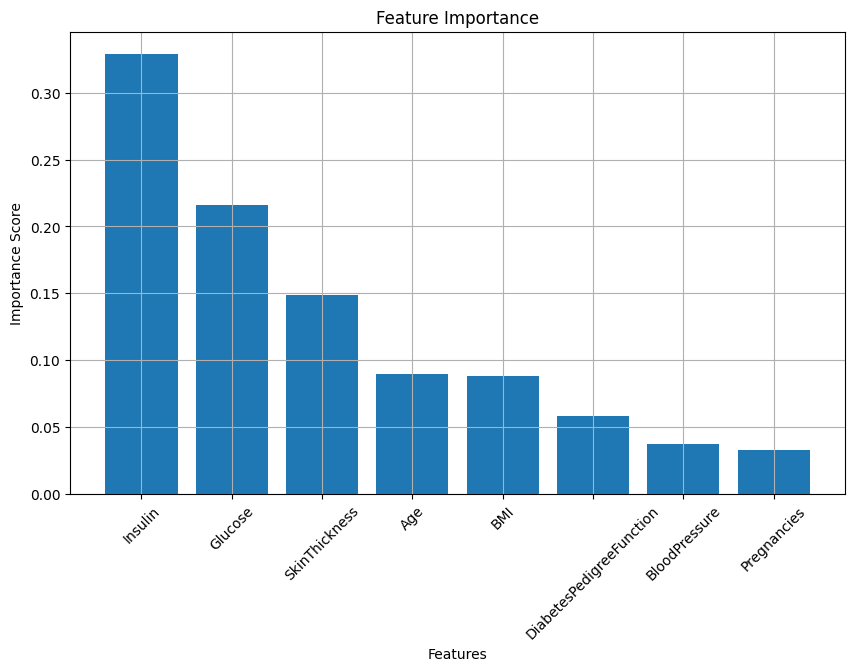

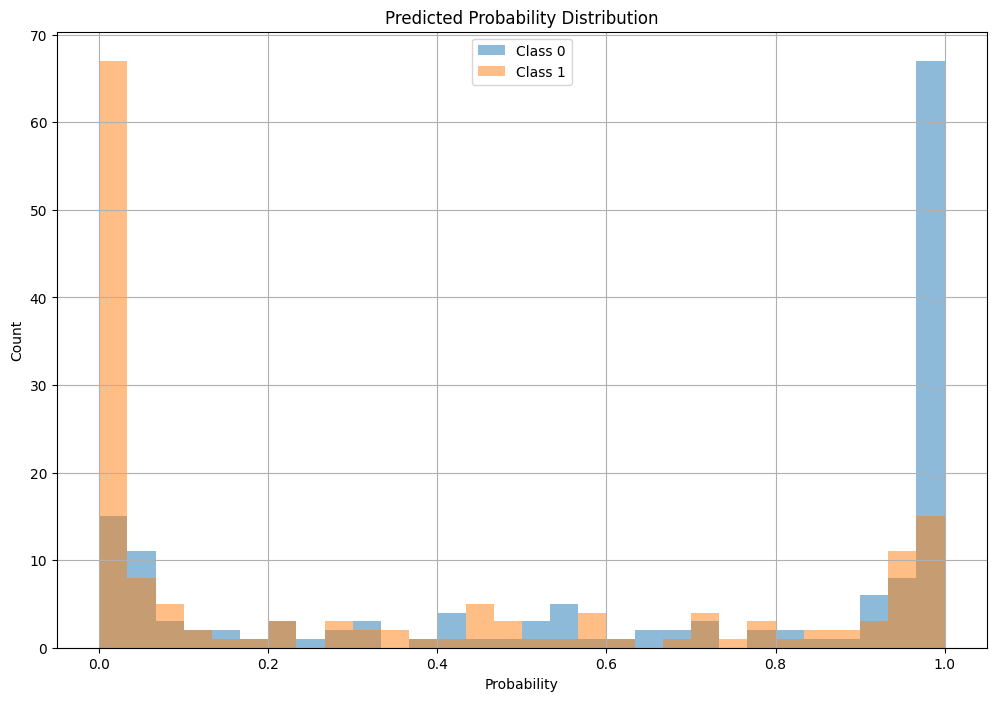

Random Forest Classifier:
Accuracy: 94.16%
Precision: 0.960
Recall: 0.873
F1-score: 0.914
ROC-AUC: 0.988

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.96      0.87      0.91        55

    accuracy                           0.94       154
   macro avg       0.95      0.93      0.93       154
weighted avg       0.94      0.94      0.94       154


Confusion Matrix:
[[97  2]
 [ 7 48]]


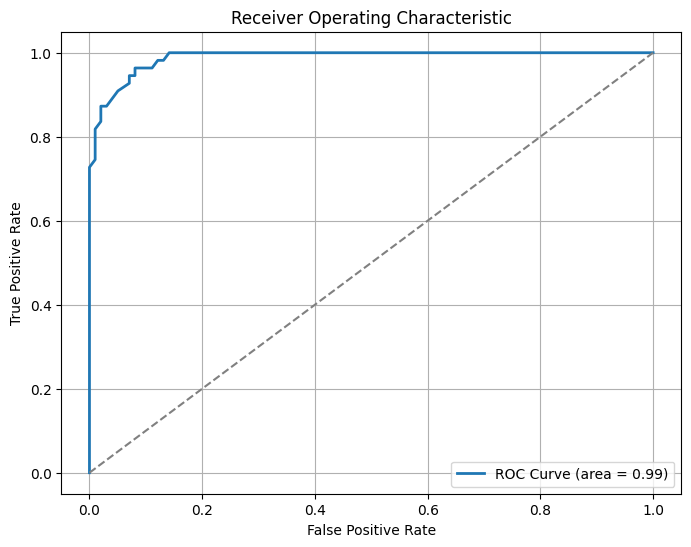

In [16]:
def train_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)
    return rf_model

def plot_feature_importance(model, feature_names):
    feature_importance = pd.Series(model.feature_importances_, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance.index, feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def plot_predicted_probability_distribution(model, X_test):
    y_pred_prob = model.predict_proba(X_test)
    
    plt.figure(figsize=(12, 8))
    for class_label in range(2):
        plt.hist(y_pred_prob[:, class_label], bins=30, alpha=0.5, label=f"Class {class_label}")
    plt.title("Predicted Probability Distribution")
    plt.xlabel("Probability")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (positive class)
    
    print('Random Forest Classifier:')
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", f"{accuracy * 100:.2f}%")
    
    precision = precision_score(y_test, y_pred)
    print("Precision:", f"{precision:.3f}")
    
    recall = recall_score(y_test, y_pred)
    print("Recall:", f"{recall:.3f}")
    
    f1 = f1_score(y_test, y_pred)
    print("F1-score:", f"{f1:.3f}")
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC:", f"{roc_auc:.3f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    

# Assuming you have the 'train_df' containing the predictor variables and target variable 'Outcome'
X_train, X_test, y_train, y_test = split_data(train_df)

# Train the Random Forest model
rf_model = train_random_forest(X_train, y_train)

# Plot feature importance
plot_feature_importance(rf_model, X_train.columns)

# Plot predicted probability distribution
plot_predicted_probability_distribution(rf_model, X_test)

# Evaluate the model
evaluate_model(rf_model, X_test, y_test)

Training and Testing Results

In [17]:
# Make predictions on the training and testing data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the training set
print("Training Set Results:")
print("Accuracy:", f"{accuracy_score(y_train, y_train_pred) * 100:.2f}%")

# Evaluate the model on the testing set
print("\nTesting Set Results:")
print("Accuracy:", f"{accuracy_score(y_test, y_test_pred) * 100:.2f}%")

# Evalute possible overfitting
overfitting = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred)
overfitting_percentage = overfitting * 100
print("\nPossible Overfitting:")
print("Overfitting:", f"{overfitting_percentage:.2f}%")

Training Set Results:
Accuracy: 100.00%

Testing Set Results:
Accuracy: 94.16%

Possible Overfitting:
Overfitting: 5.84%


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

<b>Feature Importance:</b> The model identifies the top 5 features that have the most significant impact on predicting the outcome of diabetes. These features, in descending order of importance, are insulin, glucose, skin thickness, age, and BMI. These variables are crucial in predicting whether a person is likely to develop diabetes.

<b>Interaction Effects:</b> The model reveals significant interaction effects between certain predictor variables. Specifically, there are statistically significant interaction terms between the constant term, glucose, BMI, diabetes pedigree function, and age. This indicates that the relationship between these variables is not independent and can influence the outcome differently based on their interactions.

<b>Model Performance:</b> The Random Forest Classifier demonstrates strong performance with an accuracy of 94.16%. It achieves high precision (0.960) and recall (0.873) for the positive class (indicating diabetes). The F1-score, which balances precision and recall, is 0.914. The ROC-AUC score of 0.988 indicates that the model has excellent discrimination ability in distinguishing between the two classes.

<b>Overfitting:</b> There is evidence of potential overfitting, as the model achieves 100% accuracy on the training set but slightly lower accuracy (94.16%) on the testing set. The difference between training and testing set accuracy (5.84%) suggests that the model may perform slightly worse on unseen data. It is essential to consider regularization techniques or further fine-tuning of hyperparameters to reduce overfitting and improve generalization to new data.